In [1]:
pip install tensorflow


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


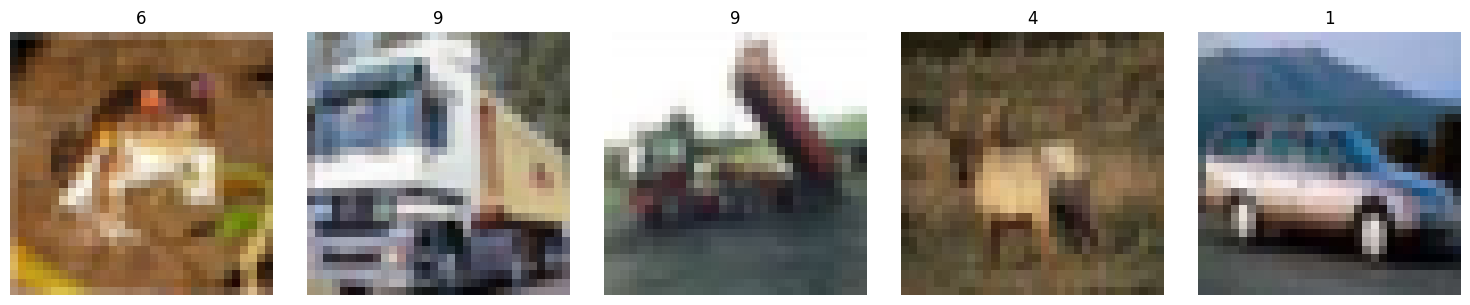

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

def load_cifar10_batch(file):
    with open(file, 'rb') as fo:
        dict_data = pickle.load(fo, encoding='bytes')
    return dict_data

# Load data batches
batch_files = [
    "/content/data_batch_1",
    "/content/data_batch_2",
    "/content/data_batch_3",
    "/content/data_batch_4",
    "/content/data_batch_5"
]

data_batches = [load_cifar10_batch(file) for file in batch_files]

# Extract data and labels
images = np.vstack([batch[b'data'] for batch in data_batches])
labels = np.hstack([batch[b'labels'] for batch in data_batches])

# Reshape data
images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Display first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for ax, img, lbl in zip(axes, images, labels):
    ax.imshow(img)
    ax.set_title(lbl)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# ... [LOAD CIFAR-10 DATA AS SHOWN EARLIER] ...

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the images to be in the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, 10)
y_val_onehot = to_categorical(y_val, 10)


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), epochs=10, batch_size=64)


Epoch 1/10
625/625 [==============================] - 99s 156ms/step - loss: 1.4904 - accuracy: 0.4684 - val_loss: 1.2226 - val_accuracy: 0.5619
Epoch 2/10
625/625 [==============================] - 80s 128ms/step - loss: 1.1182 - accuracy: 0.6080 - val_loss: 1.0896 - val_accuracy: 0.6167
Epoch 3/10
625/625 [==============================] - 80s 127ms/step - loss: 0.9757 - accuracy: 0.6577 - val_loss: 1.0080 - val_accuracy: 0.6459
Epoch 4/10
625/625 [==============================] - 86s 138ms/step - loss: 0.8666 - accuracy: 0.6984 - val_loss: 0.9094 - val_accuracy: 0.6847
Epoch 5/10
625/625 [==============================] - 80s 128ms/step - loss: 0.7814 - accuracy: 0.7266 - val_loss: 0.9135 - val_accuracy: 0.6822
Epoch 6/10
625/625 [==============================] - 79s 127ms/step - loss: 0.7082 - accuracy: 0.7536 - val_loss: 0.9013 - val_accuracy: 0.6920
Epoch 7/10
625/625 [==============================] - 80s 127ms/step - loss: 0.6359 - accuracy: 0.7778 - val_loss: 0.8955 - val_ac

In [7]:
loss, accuracy = model.evaluate(X_val, y_val_onehot)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


313/313 [==============================] - 5s 17ms/step - loss: 0.9633 - accuracy: 0.6994
Validation Accuracy: 69.94%


In [8]:
from tensorflow.keras.layers import LeakyReLU

# Define a CNN model with ReLU activation
def create_cnn_model(activation='relu'):
    model = Sequential()
    if activation == 'leaky_relu':
        model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
        model.add(LeakyReLU())
    else:
        model.add(Conv2D(32, (3, 3), activation=activation, padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation=activation, padding='same'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(10, activation='softmax'))
    return model

model_relu = create_cnn_model('relu')
model_leaky_relu = create_cnn_model('leaky_relu')
model_sigmoid = create_cnn_model('sigmoid')


In [9]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_relu = model_relu.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), epochs=10, batch_size=64)

model_leaky_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_leaky_relu = model_leaky_relu.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), epochs=10, batch_size=64)

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_sigmoid = model_sigmoid.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), epochs=10, batch_size=64)


Epoch 1/10
625/625 [==============================] - 89s 140ms/step - loss: 1.4719 - accuracy: 0.4749 - val_loss: 1.2174 - val_accuracy: 0.5679
Epoch 2/10
625/625 [==============================] - 80s 128ms/step - loss: 1.1168 - accuracy: 0.6076 - val_loss: 1.0435 - val_accuracy: 0.6353
Epoch 3/10
625/625 [==============================] - 81s 129ms/step - loss: 0.9630 - accuracy: 0.6655 - val_loss: 0.9833 - val_accuracy: 0.6571
Epoch 4/10
625/625 [==============================] - 79s 127ms/step - loss: 0.8651 - accuracy: 0.6969 - val_loss: 0.9323 - val_accuracy: 0.6760
Epoch 5/10
625/625 [==============================] - 80s 128ms/step - loss: 0.7883 - accuracy: 0.7257 - val_loss: 0.9136 - val_accuracy: 0.6874
Epoch 6/10
625/625 [==============================] - 79s 126ms/step - loss: 0.7139 - accuracy: 0.7473 - val_loss: 0.8905 - val_accuracy: 0.6960
Epoch 7/10
625/625 [==============================] - 79s 127ms/step - loss: 0.6528 - accuracy: 0.7736 - val_loss: 0.9129 - val_ac

In [10]:
def create_configured_cnn(filters=(32, 64), kernel_size=(3, 3), strides=(1, 1)):
    model = Sequential()
    model.add(Conv2D(filters[0], kernel_size, strides=strides, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(filters[1], kernel_size, strides=strides, activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Example models based on configurations
model_config_1 = create_configured_cnn(filters=(16, 32))
model_config_2 = create_configured_cnn(kernel_size=(5, 5))
model_config_3 = create_configured_cnn(strides=(2, 2))

# Train the models
for model in [model_config_1, model_config_2, model_config_3]:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), epochs=10, batch_size=64)


Epoch 1/10
625/625 [==============================] - 46s 73ms/step - loss: 1.5806 - accuracy: 0.4354 - val_loss: 1.2994 - val_accuracy: 0.5402
Epoch 2/10
625/625 [==============================] - 47s 76ms/step - loss: 1.2055 - accuracy: 0.5751 - val_loss: 1.1665 - val_accuracy: 0.5908
Epoch 3/10
625/625 [==============================] - 52s 83ms/step - loss: 1.0763 - accuracy: 0.6227 - val_loss: 1.0592 - val_accuracy: 0.6332
Epoch 4/10
625/625 [==============================] - 47s 75ms/step - loss: 0.9897 - accuracy: 0.6517 - val_loss: 1.0385 - val_accuracy: 0.6396
Epoch 5/10
625/625 [==============================] - 44s 71ms/step - loss: 0.9271 - accuracy: 0.6796 - val_loss: 0.9869 - val_accuracy: 0.6580
Epoch 6/10
625/625 [==============================] - 48s 77ms/step - loss: 0.8673 - accuracy: 0.6973 - val_loss: 0.9944 - val_accuracy: 0.6539
Epoch 7/10
625/625 [==============================] - 44s 71ms/step - loss: 0.8188 - accuracy: 0.7146 - val_loss: 1.0334 - val_accuracy:

In [11]:
from sklearn.metrics import classification_report

# Function to evaluate a model
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val).argmax(axis=1)
    report = classification_report(y_val, y_pred, output_dict=True)
    return report

# Evaluate the models
reports = []
models = [model_relu, model_leaky_relu, model_sigmoid, model_config_1, model_config_2, model_config_3]
for model in models:
    report = evaluate_model(model, X_val, y_val)
    reports.append(report)


313/313 [==============================] - 2s 5ms/step


In [12]:
import pandas as pd

# Extract metrics and create a DataFrame
model_names = ['ReLU', 'Leaky ReLU', 'Sigmoid', 'Config 1', 'Config 2', 'Config 3']
data = {
    'Model': model_names,
    'Accuracy': [rep['accuracy'] for rep in reports],
    'Precision': [rep['macro avg']['precision'] for rep in reports],
    'Recall': [rep['macro avg']['recall'] for rep in reports],
    'F1-Score': [rep['macro avg']['f1-score'] for rep in reports]
}
df = pd.DataFrame(data)
print(df)


        Model  Accuracy  Precision    Recall  F1-Score
0        ReLU    0.6977   0.696468  0.698577  0.694326
1  Leaky ReLU    0.7053   0.708274  0.705757  0.704260
2     Sigmoid    0.5497   0.553093  0.548971  0.547538
3    Config 1    0.6827   0.685200  0.683556  0.681828
4    Config 2    0.6972   0.700662  0.698424  0.697198
5    Config 3    0.6336   0.643375  0.633183  0.631713
